In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import operator
from timeit import default_timer as timer
from src.main import prepare_attribut_data, prepare_result_data
from src.utils import convert_time
from src.main import convert_to_one_hot


In [41]:
train_path_away = './data/Train_Data/train_away_team_statistics_df.csv'
train_path_home = './data/Train_Data/train_home_team_statistics_df.csv'
train_path_result = './data/Train_Data/Y_train.csv'
df_attribut = prepare_attribut_data(train_path_away, train_path_home)
df_result = prepare_result_data(train_path_result)

In [29]:
df_attribut.head()

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,0,4.0,1.0,4.0,1.0,5.0,4.0,3.0,6.0,4.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,4.0,3.0,4.0,3.0,8.0,8.0,7.0,8.0,5.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,4.0,3.0,4.0,2.0,6.0,4.0,4.0,1.0,6.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,0.0,0.0,0.0,0.0,1.0,3.0,3.0,8.0,1.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,0.0,6.0
4,4,5.0,4.0,5.0,6.0,5.0,6.0,6.0,4.0,5.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [30]:
df_result.head()

,result
0,1
1,0
2,1
3,2
4,0


In [31]:
from sklearn.model_selection import train_test_split

attribut_train, attribut_test, result_train, result_test = train_test_split(df_attribut, df_result, test_size=0.1,
                                                                            random_state=10)


In [32]:



max_iter_list = [250, 500,2500]
solver_list = ['linear', 'poly', 'rbf', 'sigmoid']
regularization_factor_list = [1, 0.1, 0.01]
accuracy_dict = {}
time_dict = {}
svm_dict = {}
for max_iter in max_iter_list:
    for solver in solver_list:
        for regularization_factor in regularization_factor_list:
            start = timer()

            svm = SVC(max_iter=max_iter, kernel=solver, C=regularization_factor).fit(attribut_train, result_train)
            
            yhat = svm.predict(attribut_test)
            accuracy = np.round(accuracy_score(result_test, yhat), 4)
            
            key = f'solver_{solver}_iter_{max_iter}_C_{regularization_factor}'
            accuracy_dict[key] = accuracy
            svm_dict[key] = svm
            end = timer()
            time_dict[key] = convert_time(start,end)



C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre

In [33]:
accuracy_dict

{'solver_linear_iter_250_C_1': 0.2729,
 'solver_linear_iter_250_C_0.1': 0.2729,
 'solver_linear_iter_250_C_0.01': 0.2729,
 'solver_poly_iter_250_C_1': 0.4094,
 'solver_poly_iter_250_C_0.1': 0.4094,
 'solver_poly_iter_250_C_0.01': 0.4094,
 'solver_rbf_iter_250_C_1': 0.3371,
 'solver_rbf_iter_250_C_0.1': 0.3371,
 'solver_rbf_iter_250_C_0.01': 0.3371,
 'solver_sigmoid_iter_250_C_1': 0.3428,
 'solver_sigmoid_iter_250_C_0.1': 0.342,
 'solver_sigmoid_iter_250_C_0.01': 0.342,
 'solver_linear_iter_500_C_1': 0.3477,
 'solver_linear_iter_500_C_0.1': 0.3477,
 'solver_linear_iter_500_C_0.01': 0.2957,
 'solver_poly_iter_500_C_1': 0.4119,
 'solver_poly_iter_500_C_0.1': 0.4119,
 'solver_poly_iter_500_C_0.01': 0.4119,
 'solver_rbf_iter_500_C_1': 0.3542,
 'solver_rbf_iter_500_C_0.1': 0.3542,
 'solver_rbf_iter_500_C_0.01': 0.3542,
 'solver_sigmoid_iter_500_C_1': 0.3339,
 'solver_sigmoid_iter_500_C_0.1': 0.342,
 'solver_sigmoid_iter_500_C_0.01': 0.3428,
 'solver_linear_iter_2500_C_1': 0.2705,
 'solver_li

In [34]:
time_dict

{'solver_linear_iter_250_C_1': '00m01s',
 'solver_linear_iter_250_C_0.1': '00m01s',
 'solver_linear_iter_250_C_0.01': '00m01s',
 'solver_poly_iter_250_C_1': '00m03s',
 'solver_poly_iter_250_C_0.1': '00m03s',
 'solver_poly_iter_250_C_0.01': '00m03s',
 'solver_rbf_iter_250_C_1': '00m03s',
 'solver_rbf_iter_250_C_0.1': '00m03s',
 'solver_rbf_iter_250_C_0.01': '00m03s',
 'solver_sigmoid_iter_250_C_1': '00m03s',
 'solver_sigmoid_iter_250_C_0.1': '00m03s',
 'solver_sigmoid_iter_250_C_0.01': '00m03s',
 'solver_linear_iter_500_C_1': '00m01s',
 'solver_linear_iter_500_C_0.1': '00m01s',
 'solver_linear_iter_500_C_0.01': '00m01s',
 'solver_poly_iter_500_C_1': '00m05s',
 'solver_poly_iter_500_C_0.1': '00m05s',
 'solver_poly_iter_500_C_0.01': '00m05s',
 'solver_rbf_iter_500_C_1': '00m06s',
 'solver_rbf_iter_500_C_0.1': '00m07s',
 'solver_rbf_iter_500_C_0.01': '00m06s',
 'solver_sigmoid_iter_500_C_1': '00m05s',
 'solver_sigmoid_iter_500_C_0.1': '00m07s',
 'solver_sigmoid_iter_500_C_0.01': '00m06s',


In [35]:
max_accuracy = max(accuracy_dict.items(), key=operator.itemgetter(1))
best_svm= svm_dict[max_accuracy[0]]

In [36]:
max_accuracy

('solver_poly_iter_2500_C_1', 0.4517)

In [37]:
yhat = best_svm.predict(attribut_test)
np.round(accuracy_score(result_test, yhat), 4)

0.4517

In [38]:
yhat

array([2, 2, 2, ..., 2, 2, 2])

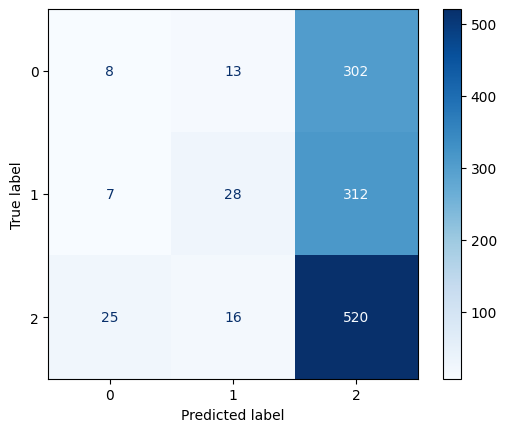

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(result_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1, 2], )
disp.plot(cmap="Blues")

In [40]:
test_path_away = 'data/Test_Data/train_away_team_statistics_df.csv'
test_path_home = 'data/Test_Data/train_home_team_statistics_df.csv'
df_attribut_test = prepare_attribut_data(test_path_away, test_path_home)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Test_Data/train_away_team_statistics_df.csv'

In [ ]:
df_attribut_test.head()

In [ ]:
yhat_test = best_svm.predict(df_attribut_test)


In [ ]:

y_pred_test = pd.DataFrame(yhat_test)
y_pred_test = convert_to_one_hot(yhat_test)

In [ ]:
y_pred_test

In [ ]:
test_prediction = pd.concat([df_attribut_test['ID'], y_pred_test], axis=1)

In [ ]:
test_prediction.to_csv('./submission/logistic_benchmark_submission.csv', index=False)